<br><br>

<font color=#191347 ><font>
<p style = "font-family:times;">
    <font size="7">
        Interactive Learning 
    </font>    
</p>

<br>
    
<font color=#ed1c24><font>
<p style = "font-family:optima;">
    <font size="6">
        Homework #4
    </font>    
<font color=#000000> <font>
</p>

> $\textit{Mohammad Saadati - 810198410}$

# Table of Contents

- [Packages](#0)
- [Question 1](#1)
    - [Q-Learning](#1-1)
        - [Run](#1-1-1)
    - [plot result](#1-2)
    - [test learned agent](#1-3)
- [Question 2](#2)
- [Question 3](#3)
    - [SARSA](#3-1)
        - [Run](#3-1-1)
    - [n-Step Tree Backup](#3-2)
        - [Run](#3-2-1)
    - [plot result](#3-3)
    - [test learned agent](#3-4)
- [Question 4](#4)
    - [On-Policy MC](#4-1)
        - [Run](#4-1-1)
    - [plot result: REPS = 1](#4-2)
    - [plot result: REPS = 4](#4-3)
    - [plot result: REPS = 10](#4-4)
    - [test learned agent](#4-5)
- [Question 5](#5)
    - [On-Policy MC_v2](#5-1)
        - [Run](#5-1-1)
    - [plot result: REPS = 1](#5-2)
    - [plot result: REPS = 4](#5-3)
    - [plot result: REPS = 10](#5-4)
    - [test learned agent](#5-5)

<a name='0'></a>
## Packages

Run the following cell to load the packages you'll need.

In [1]:
#%% import
import numpy as np
import gym
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
from IPython.display import HTML
import base64

In [2]:
#%% hyperparameters
REPS = 20
EPISODES = 2000
EPSILON = 0.1
LEARNING_RATE = 0.1
DISCOUNT = 0.9
STUDENT_NUM = 410

ACTIONS = [0,1,2,3,4,5]

In [3]:
#%%environment
env = gym.make('Taxi-v3')
env.seed(seed = STUDENT_NUM)
# env.reset(seed = STUDENT_NUM)
Initial_State = env.reset()
Initial_State

66

In [4]:
taxi_row, taxi_col, pass_idx, dest_idx = env.decode(66)
taxi_row, taxi_col, pass_idx, dest_idx

(0, 3, 1, 2)

In [5]:
#%% get familiar with the environment
print("you can see the environment in each step by render command :")
env.render()

you can see the environment in each step by render command :
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [275]:
def run_optimal_policy(agent):
    state = agent.reset()
    rewards = []

    while True:
        action = agent.choose_best_action(state)
        next_state, reward, done = agent.take_action(action)
        state = next_state
        rewards.append(reward)

        if done:
            break
    
    return np.sum(rewards)

In [219]:
def run_20_episode(agent):
    for episode in range(20):
        state = agent.reset()
        rewards = []
               
        clear_output(wait=True)
        env.render()
        time.sleep(0.5)
        
        while True:
            
            action = agent.choose_best_action(state)
            next_state, reward, done = agent.take_action(action)
            state = next_state
            rewards.append(reward)
            
            clear_output(wait=True)
            env.render()
            print("Score:", np.sum(rewards))
            time.sleep(0.5)

            if done:
                break

<a name='1'></a>
# Question 1

<a name='1-1'></a>
## Q-Learning

In [8]:
class QLearning():
    def __init__(self, env, discount, learning_rate, epsilon_decay_rate, learning_rate_decay_rate):
        self.env = env
        self.discount = discount
        self.learning_rate = learning_rate
        self.epsilon_decay_rate = epsilon_decay_rate
        self.learning_rate_decay_rate = learning_rate_decay_rate
        
        self.epsilon = 1
        self.observation_space = self.env.observation_space.n
        self.action_space = self.env.action_space.n
        self.q_value = np.zeros((self.observation_space, self.action_space)) 
#         self.q_value = np.random.rand(self.observation_space, self.action_space) 

    def choose_action(self, state):
        p = np.random.rand()
        if p < self.epsilon:
            action = self.env.action_space.sample()
        else:
            action = self.choose_best_action(state)
        return action
    
    def choose_best_action(self, state):
        return np.argmax(self.q_value[state,:])
        
    def take_action(self, action):
        next_state, reward, done, _ = self.env.step(action)
        return next_state, reward, done

    def update_value(self, state, action, next_state, reward):
        self.q_value[state][action] = self.q_value[state][action] + self.learning_rate * \
                                (reward + self.discount * np.max(self.q_value[next_state,:]) - self.q_value[state][action])

    def decay_epsilon(self, episode):
        self.epsilon = np.exp(-self.epsilon_decay_rate*(episode+1))

    def decay_learning_rate(self, episode):
        self.learning_rate = 0.99*np.exp(-self.learning_rate_decay_rate*(episode+1))
        
    def reset(self):
        self.env.seed(seed = STUDENT_NUM)
        Initial_state = self.env.reset()
        return Initial_state

In [9]:
def agent_QLearning_run(is_decay_epsilon, is_decay_learning_rate):
    cumulative_reward = np.zeros((REPS, EPISODES))
    optimal_cumulative_reward = -np.inf
    optimal_agent = None
    
    for rep in range(REPS):
        agent = QLearning(env, DISCOUNT, (0.99 if is_decay_learning_rate else LEARNING_RATE), 0.003, 0.0023)

        for episode in range(EPISODES):
            state = agent.reset()
            rewards = []

            while True:
                action = agent.choose_action(state)
                next_state, reward, done = agent.take_action(action)
                agent.update_value(state, action, next_state, reward)
                state = next_state
                rewards.append(reward)

                if done:
                    break

            cumulative_reward[rep][episode] = np.sum(rewards)
            if is_decay_epsilon:
                agent.decay_epsilon(episode+1)
            if is_decay_learning_rate:
                agent.decay_learning_rate(episode+1)
        
        optimal_cumulative_reward = max(optimal_cumulative_reward, run_optimal_policy(agent))
        optimal_agent = agent
        
    return cumulative_reward, optimal_cumulative_reward, optimal_agent            

<a name='1-1-1'></a>
### Run

In [10]:
cumulative_reward_QLearning_no_decay_learning_rate, optimal_policy_1, optimal_agent_1 = agent_QLearning_run(is_decay_epsilon=True, is_decay_learning_rate=False)

In [11]:
cumulative_reward_QLearning_decay_learning_rate, optimal_policy_2, optimal_agent_2 = agent_QLearning_run(is_decay_epsilon=True, is_decay_learning_rate=True)

<a name='1-2'></a>
## plot result

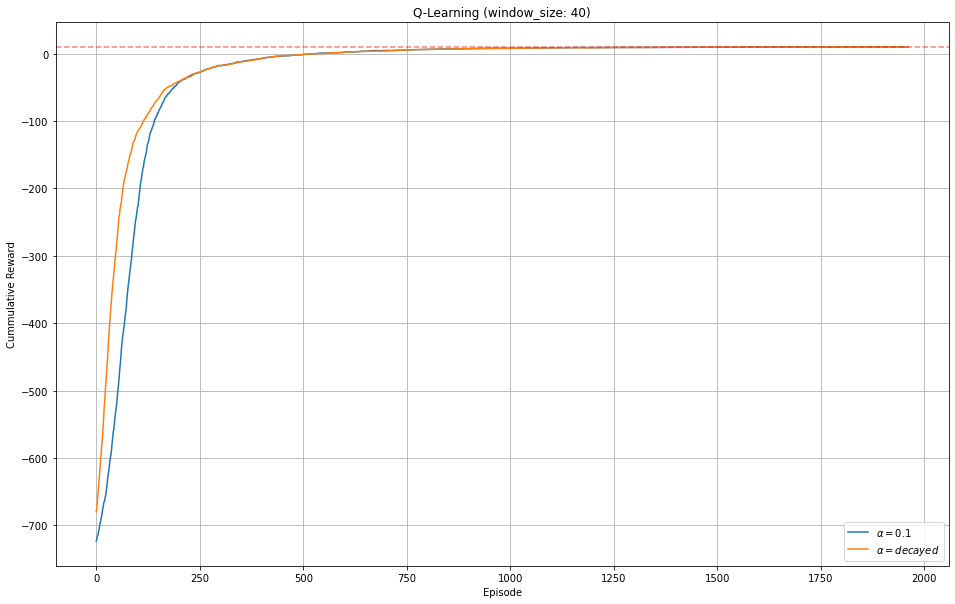

In [10]:
plt.figure(figsize=(16,10))
plt.title('Q-Learning (window_size: 40)')
plt.plot(np.convolve(np.mean(cumulative_reward_QLearning_no_decay_learning_rate, axis=0), np.ones(40)/40, mode='valid'), label='$α=0.1$')
plt.plot(np.convolve(np.mean(cumulative_reward_QLearning_decay_learning_rate, axis=0), np.ones(40)/40, mode='valid'), label='$α=decayed$')
plt.axhline(y=max(optimal_policy_1, optimal_policy_2), ls='--', c='r', alpha=0.5)
plt.xlabel('Episode')
plt.ylabel('Cummulative Reward')
plt.legend()
plt.grid()
plt.show()

<a name='1-3'></a>
## test learned agent

### Q-Learning with decay learning rate:

In [13]:
run_20_episode(optimal_agent_2)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Score: 10



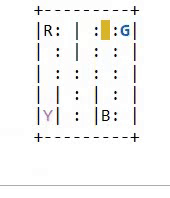

In [15]:
b64 = base64.b64encode(open("Q1.gif",'rb').read()).decode('ascii')
display(HTML(f'<img src="data:image/gif;base64,{b64}" />'))

<a name='2'></a>
# Question 2

In [20]:
unreachable_state = []

for i in range(500):
    taxi_row, taxi_col, pass_idx, dest_idx = env.decode(i)
    if pass_idx == dest_idx:
        unreachable_state.append(i)
        
print("Number of unreachable states:", len(unreachable_state))
print("Unreachable states index:\n", unreachable_state)

Number of unreachable states: 100
Unreachable states index:
 [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495]


<a name='3'></a>
# Question 3

<a name='3-1'></a>
## SARSA

In [129]:
class SARSA():
    def __init__(self, env, discount, learning_rate, epsilon_decay_rate):
        self.env = env
        self.discount = discount
        self.learning_rate = learning_rate
        self.epsilon_decay_rate = epsilon_decay_rate
        
        self.epsilon = 1
        self.observation_space = self.env.observation_space.n
        self.action_space = self.env.action_space.n
        self.q_value = np.zeros((self.observation_space, self.action_space)) 
#         self.q_value = np.random.rand(self.observation_space, self.action_space) 

    def choose_action(self, state):
        p = np.random.rand()
        if p < self.epsilon:
            action = self.env.action_space.sample()
        else:
            action = self.choose_best_action(state)
        return action
    
    def choose_best_action(self, state):
        return np.argmax(self.q_value[state,:])
        
    def take_action(self, action):
        next_state, reward, done, _ = self.env.step(action)
        return next_state, reward, done

    def update_value(self, state, action, next_state, next_action, reward):
        self.q_value[state][action] = self.q_value[state][action] + self.learning_rate * \
                                (reward + self.discount * self.q_value[next_state][next_action] - self.q_value[state][action])

    def decay_epsilon(self, episode):
        self.epsilon = np.exp(-self.epsilon_decay_rate*(episode+1))
        
    def reset(self):
        self.env.seed(seed = STUDENT_NUM)
        Initial_state = self.env.reset()
        return Initial_state

In [130]:
def agent_SARSA_run(is_decay_epsilon):
    cumulative_reward = np.zeros((REPS, EPISODES))
    optimal_cumulative_reward = -np.inf
    optimal_agent = None
    
    for rep in range(REPS):
        agent = SARSA(env, DISCOUNT, LEARNING_RATE, 0.003)

        for episode in range(EPISODES):
            state = agent.reset()
            action = agent.choose_action(state)
            rewards = []

            while True:
                next_state, reward, done = agent.take_action(action)
                next_action = agent.choose_action(next_state)
                agent.update_value(state, action, next_state, next_action, reward)
                state = next_state
                action = next_action
                rewards.append(reward)

                if done:
                    break

            cumulative_reward[rep][episode] = np.sum(rewards)
            if is_decay_epsilon:
                agent.decay_epsilon(episode+1)
        
        optimal_cumulative_reward = max(optimal_cumulative_reward, run_optimal_policy(agent))
        optimal_agent = agent
        
    return cumulative_reward, optimal_cumulative_reward, optimal_agent

<a name='3-1-1'></a>
### Run

In [131]:
cumulative_reward_SARSA, optimal_policy_1, optimal_agent_1 = agent_SARSA_run(is_decay_epsilon=True)

<a name='3-2'></a>
## n-Step Tree Backup

In [132]:
class NStepTreeBackup():
    def __init__(self, env, discount, learning_rate, epsilon_decay_rate, N):
        self.env = env
        self.discount = discount
        self.learning_rate = learning_rate
        self.epsilon_decay_rate = epsilon_decay_rate
        self.N = N
        
        self.epsilon = 1
        self.observation_space = self.env.observation_space.n
        self.action_space = self.env.action_space.n
#         self.q_value = np.zeros((self.observation_space, self.action_space)) 
        self.q_value = np.random.rand(self.observation_space, self.action_space) 
        self.pi = np.zeros((self.observation_space, self.action_space)) 
        for i in range(self.observation_space):
            self.pi[i, np.argmax(self.q_value[i,:])] = 1
            
    def choose_action(self, state):
        p = np.random.rand()
        if p < self.epsilon:
            action = self.env.action_space.sample()
        else:
            action = self.choose_best_action(state)
        return action
    
    def choose_best_action(self, state):
        return np.argmax(self.q_value[state,:])
    
    def take_action(self, action):
        next_state, reward, done, _ = self.env.step(action)
        return next_state, reward, done

    def update_value(self, state, action, G):
        self.q_value[state][action] = self.q_value[state][action] + self.learning_rate*(G - self.q_value[state][action])
        self.pi[state] = np.zeros(self.action_space)
        self.pi[state][np.argmax(self.q_value[state])] = 1

    def decay_epsilon(self, episode):
        self.epsilon = np.exp(-self.epsilon_decay_rate*(episode+1))
        
    def reset(self):
        self.env.seed(seed = STUDENT_NUM)
        Initial_state = self.env.reset()
        return Initial_state

In [133]:
def agent_n_step_Tree_Backup_run(n, is_decay_epsilon):
    cumulative_reward = np.zeros((REPS, EPISODES))
    optimal_cumulative_reward = -np.inf
    optimal_agent = None
    
    for rep in range(REPS):
        agent = NStepTreeBackup(env, DISCOUNT, LEARNING_RATE, 0.003, n)
        
        for episode in range(EPISODES):
            states = [agent.reset()]
            actions = [agent.choose_action(states[0])]
            rewards = [np.nan]

            T = np.inf
            t = 0
            while(True):
                if t<T:
                    next_state, reward, done = agent.take_action(actions[t])
                    states.append(next_state)
                    rewards.append(reward)
                    if done:
                        T = t+1
                    else:
                        next_action = agent.choose_action(states[t+1])
                        actions.append(next_action)

                tau = t+1-n
                if tau>=0:
                    discount = agent.discount
                    q_value = agent.q_value
                    pi = agent.pi

                    G = 0
                    if t+1>=T:
                        G = rewards[T]
                    else:
                        G = rewards[t+1] + discount*np.sum(pi[states[t+1]]*q_value[states[t+1]])
                    for k in reversed(range(tau+1, min(t, T-1))):
                        G = rewards[k] + \
                            discount*np.sum(np.delete(pi[states[k]], actions[k])*np.delete(q_value[states[k]], actions[k])) + \
                            discount*pi[states[k]][actions[k]]*G

                    agent.update_value(states[tau], actions[tau], G)

                if tau==T-1:
                    break
                t += 1

            cumulative_reward[rep][episode]=np.sum(rewards[1:])
            if is_decay_epsilon:
                agent.decay_epsilon(episode+1)
            
        optimal_cumulative_reward = max(optimal_cumulative_reward, run_optimal_policy(agent))
        optimal_agent = agent
        
    return cumulative_reward, optimal_cumulative_reward, optimal_agent

<a name='3-2-1'></a>
### Run

In [134]:
cumulative_reward_1_step_Tree_Backup, optimal_policy_2, optimal_agent_2 = agent_n_step_Tree_Backup_run(1, is_decay_epsilon=True)

In [135]:
cumulative_reward_2_step_Tree_Backup, optimal_policy_3, optimal_agent_3 = agent_n_step_Tree_Backup_run(2, is_decay_epsilon=True)

In [136]:
cumulative_reward_3_step_Tree_Backup, optimal_policy_4, optimal_agent_4 = agent_n_step_Tree_Backup_run(3, is_decay_epsilon=True)

In [137]:
cumulative_reward_4_step_Tree_Backup, optimal_policy_5, optimal_agent_5 = agent_n_step_Tree_Backup_run(4, is_decay_epsilon=True)

<a name='3-3'></a>
## plot result

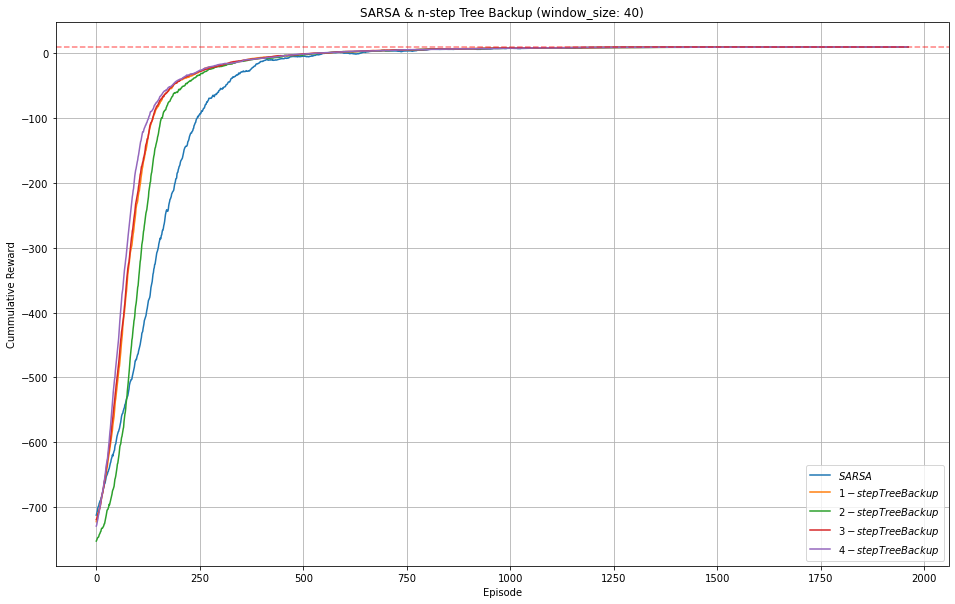

In [138]:
plt.figure(figsize=(16,10))
plt.title('SARSA & n-step Tree Backup (window_size: 40)')
plt.plot(np.convolve(np.mean(cumulative_reward_SARSA, axis=0), np.ones(40)/40, mode='valid'), label='$SARSA$')
plt.plot(np.convolve(np.mean(cumulative_reward_1_step_Tree_Backup, axis=0), np.ones(40)/40, mode='valid'), label='$1-step Tree Backup$')
plt.plot(np.convolve(np.mean(cumulative_reward_2_step_Tree_Backup, axis=0), np.ones(40)/40, mode='valid'), label='$2-step Tree Backup$')
plt.plot(np.convolve(np.mean(cumulative_reward_3_step_Tree_Backup, axis=0), np.ones(40)/40, mode='valid'), label='$3-step Tree Backup$')
plt.plot(np.convolve(np.mean(cumulative_reward_4_step_Tree_Backup, axis=0), np.ones(40)/40, mode='valid'), label='$4-step Tree Backup$')
plt.axhline(y=max(optimal_policy_1, optimal_policy_2, optimal_policy_3, optimal_policy_4, optimal_policy_5), ls='--', c='r', alpha=0.5)
plt.xlabel('Episode')
plt.ylabel('Cummulative Reward')
plt.legend()
plt.grid()
plt.show()

<a name='3-4'></a>
## test learned agent

### 4-step Tree Backup

In [139]:
run_20_episode(optimal_agent_5)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Score: 10



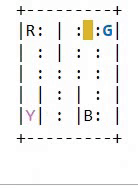

In [8]:
b64 = base64.b64encode(open("Q3.gif",'rb').read()).decode('ascii')
display(HTML(f'<img src="data:image/gif;base64,{b64}" />'))

<a name='4'></a>
# Question 4

<a name='4-1'></a>
## On-Policy MC

In [164]:
class On_Policy_MC():
    def __init__(self, env, discount, epsilon, epsilon_decay_rate):
        self.env = env
        self.discount = discount
        self.epsilon = epsilon
        self.epsilon_decay_rate = epsilon_decay_rate
        
        self.observation_space = self.env.observation_space.n
        self.action_space = self.env.action_space.n 
#         self.q_value = np.zeros((self.observation_space, self.action_space)) 
        self.q_value = np.random.rand(self.observation_space, self.action_space) 
        self.returns = [[[] for a in range(self.action_space)] for s in range(self.observation_space)]
        #  self.pi = np.random.rand(self.observation_space, self.action_space)
        
#         self.pi = np.zeros((self.observation_space, self.action_space))
#         for i in range(self.observation_space):
#             self.pi[i, np.argmax(self.q_value[i,:])] = 1 

#         policy = (self.epsilon/self.action_space) * np.ones((self.observation_space, self.action_space)) 
#         for s in range(self.observation_space):
#             a = np.random.choice(self.action_space)
#             policy[s][a] += (1 - self.epsilon)
#         self.pi = policy
        
        self.pi = self.generate_random_policy(self.observation_space, self.action_space)
        
    def generate_random_policy(self, states, actions) :
        return np.array([self.random_distribution(actions).tolist() for _ in range(states)])

    def random_distribution(self, n) :
        p = np.random.rand(n)
        p /= p.sum()
        return p
    
    def choose_action(self, state):
        p = np.random.rand()
        if p < self.epsilon:
            action = self.env.action_space.sample()
        else:
            action = np.argmax(self.pi[state,:])
#             action = self.choose_best_action(state)

#         action = np.argmax(self.pi[state,:])
#         action = np.random.choice(self.action_space, p=self.pi[state])
        return action
    
    def choose_best_action(self, state):
        return np.argmax(self.q_value[state,:])
    
    def take_action(self, action):
        next_state, reward, done, _ = self.env.step(action)
        return next_state, reward, done

    def update_value(self, S, A, G):
        self.returns[S][A].append(G)
        self.q_value[S,A] = np.average(self.returns[S][A])
        A_star = np.argmax(self.q_value[S,:])  
        for a in range(self.action_space):
            if a == A_star:
                self.pi[S,a] = 1 - self.epsilon + self.epsilon/self.action_space
            else:
                self.pi[S,a] = self.epsilon/self.action_space
                           
    def decay_epsilon(self, episode):
        self.epsilon = np.exp(-self.epsilon_decay_rate*(episode+1))
        
    def reset(self):
        self.env.seed(seed = STUDENT_NUM)
        Initial_state = self.env.reset()
        return Initial_state

In [208]:
def generate_episode(agent):
    state = agent.reset()
    episodes = list()
    rewards = list()
    
#     while True:
    for i in range(1000):
        action = agent.choose_action(state)
        episodes.append((state, action))
        next_state, reward, done = agent.take_action(action)
        rewards.append(reward)
        taxi_row, taxi_col, pass_idx, dest_idx = env.decode(state)
        state = next_state

        if (pass_idx == dest_idx):
            break
            
    return episodes, rewards, agent
    
def agent_On_Policy_MC_run(is_decay_epsilon):
    cumulative_reward = np.zeros((REPS, EPISODES))
    optimal_cumulative_reward = -np.inf
    optimal_agent = None
    
    for rep in range(REPS):
        agent = On_Policy_MC(env, DISCOUNT, (1 if is_decay_epsilon else 0.1), 0.003)

        for episode in range(EPISODES):
            agent.reset()
            episodes, rewards, agent = generate_episode(agent)
            
            G = 0
            for i,((S,A),R) in enumerate(reversed(list(zip(episodes,rewards)))) :
                G = DISCOUNT*G + R
                if (S,A) not in episodes[:-i-1]:
                    agent.update_value(S, A, G)
                    
            cumulative_reward[rep][episode] = np.sum(rewards)
            if is_decay_epsilon:
                agent.decay_epsilon(episode+1)
        
        optimal_cumulative_reward = max(optimal_cumulative_reward, run_optimal_policy(agent))
        optimal_agent = agent
        
    return cumulative_reward, optimal_cumulative_reward, optimal_agent

<a name='4-1-1'></a>
## Run

In [209]:
cumulative_reward_On_Policy_MC_no_decay_epsilon, optimal_policy_1, optimal_agent_1 = agent_On_Policy_MC_run(is_decay_epsilon=False)

In [210]:
cumulative_reward_On_Policy_MC_decay_epsilon, optimal_policy_2, optimal_agent_2 = agent_On_Policy_MC_run(is_decay_epsilon=True)

<a name='4-2'></a>
### plot result: REPS = 1

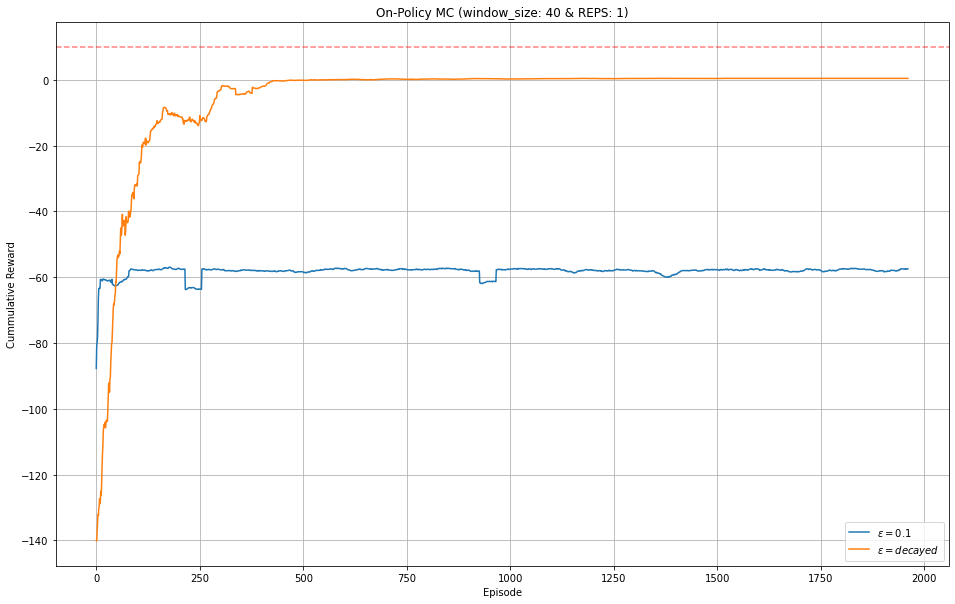

In [213]:
plt.figure(figsize=(16,10))
plt.title('On-Policy MC (window_size: 40 & REPS: 1)')
plt.plot(np.convolve(np.mean(cumulative_reward_On_Policy_MC_no_decay_epsilon, axis=0), np.ones(40)/40, mode='valid'), label='$ε=0.1$')
plt.plot(np.convolve(np.mean(cumulative_reward_On_Policy_MC_decay_epsilon, axis=0), np.ones(40)/40, mode='valid'), label='$ε=decayed$')
plt.axhline(y=max(optimal_policy_1, optimal_policy_2, 10), ls='--', c='r', alpha=0.5)
plt.xlabel('Episode')
plt.ylabel('Cummulative Reward')
plt.legend()
plt.grid()
plt.show()

<a name='4-3'></a>
### plot result: REPS = 4

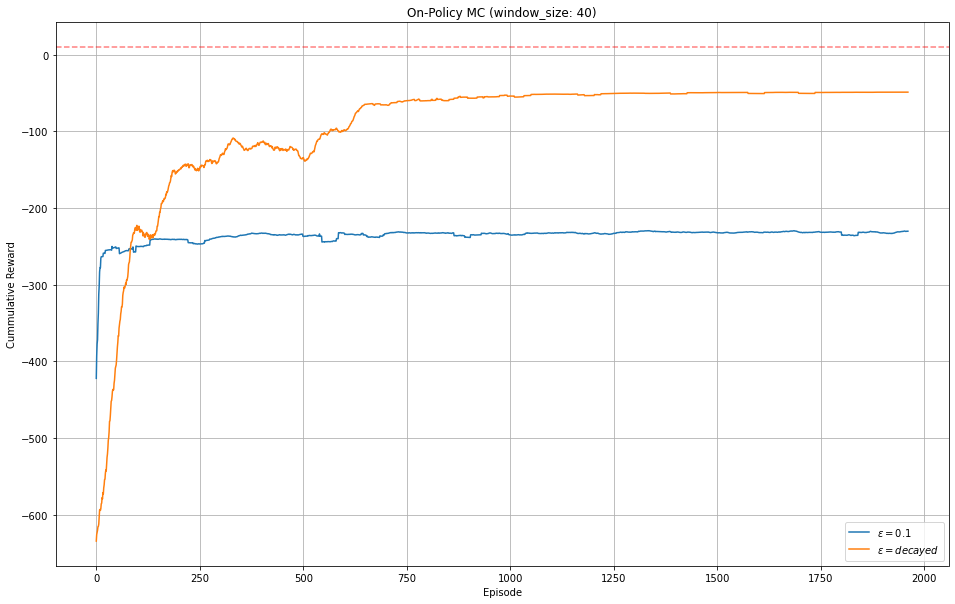

In [195]:
plt.figure(figsize=(16,10))
plt.title('On-Policy MC (window_size: 40)')
plt.plot(np.convolve(np.mean(cumulative_reward_On_Policy_MC_no_decay_epsilon, axis=0), np.ones(40)/40, mode='valid'), label='$ε=0.1$')
plt.plot(np.convolve(np.mean(cumulative_reward_On_Policy_MC_decay_epsilon, axis=0), np.ones(40)/40, mode='valid'), label='$ε=decayed$')
plt.axhline(y=max(optimal_policy_1, optimal_policy_2, 10), ls='--', c='r', alpha=0.5)
plt.xlabel('Episode')
plt.ylabel('Cummulative Reward')
plt.legend()
plt.grid()
plt.show()

<a name='4-4'></a>
### plot result: REPS = 10

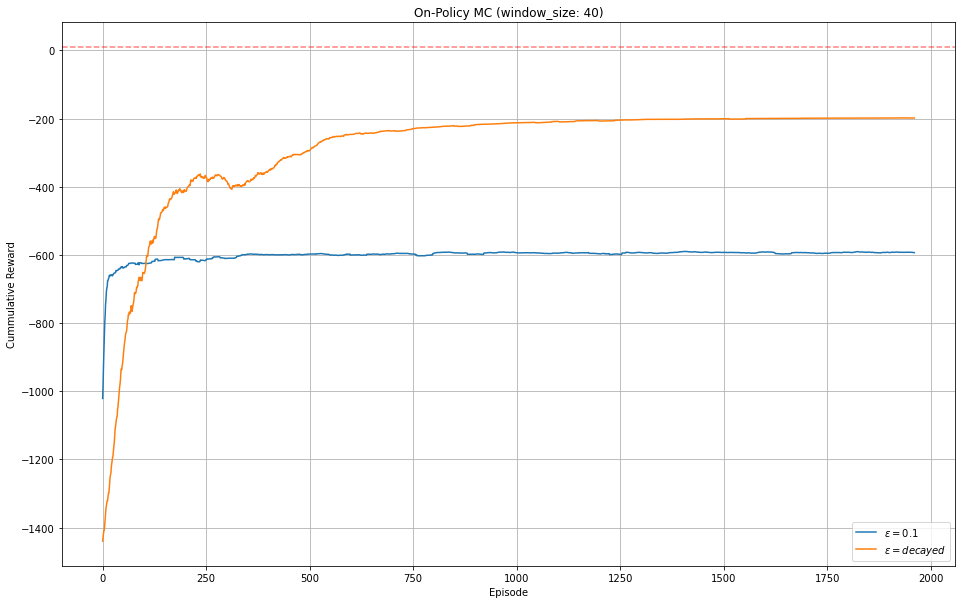

In [203]:
plt.figure(figsize=(16,10))
plt.title('On-Policy MC (window_size: 40)')
plt.plot(np.convolve(np.mean(cumulative_reward_On_Policy_MC_no_decay_epsilon, axis=0), np.ones(40)/40, mode='valid'), label='$ε=0.1$')
plt.plot(np.convolve(np.mean(cumulative_reward_On_Policy_MC_decay_epsilon, axis=0), np.ones(40)/40, mode='valid'), label='$ε=decayed$')
plt.axhline(y=max(optimal_policy_1, optimal_policy_2, 10), ls='--', c='r', alpha=0.5)
plt.xlabel('Episode')
plt.ylabel('Cummulative Reward')
plt.legend()
plt.grid()
plt.show()

<a name='4-5'></a>
## test learned agent

### On-Policy MC without decay epsilon

In [225]:
run_20_episode_2(optimal_agent_1)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
Score: -200



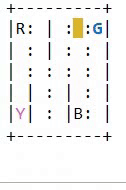

In [229]:
b64 = base64.b64encode(open("Q4-1.gif",'rb').read()).decode('ascii')
display(HTML(f'<img src="data:image/gif;base64,{b64}" />'))

### On-Policy MC with decay epsilon

In [228]:
run_20_episode_2(optimal_agent_2)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Score: 10



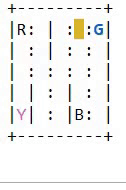

In [230]:
b64 = base64.b64encode(open("Q4-2.gif",'rb').read()).decode('ascii')
display(HTML(f'<img src="data:image/gif;base64,{b64}" />'))

<a name='5'></a>
# Question 5

<a name='5-1'></a>
## On-Policy MC_v2

In [268]:
class On_Policy_MC_v2():
    def __init__(self, env, discount, epsilon, epsilon_decay_rate):
        self.env = env
        self.discount = discount
        self.epsilon = epsilon
        self.epsilon_decay_rate = epsilon_decay_rate
        
        self.observation_space = self.env.observation_space.n
        self.action_space = self.env.action_space.n 
#         self.q_value = np.zeros((self.observation_space, self.action_space)) 
        self.q_value = np.random.rand(self.observation_space, self.action_space) 
        self.returns = [[[] for a in range(self.action_space)] for s in range(self.observation_space)]
        #  self.pi = np.random.rand(self.observation_space, self.action_space)
        
#         self.pi = np.zeros((self.observation_space, self.action_space))
#         for i in range(self.observation_space):
#             self.pi[i, np.argmax(self.q_value[i,:])] = 1 

#         policy = (self.epsilon/self.action_space) * np.ones((self.observation_space, self.action_space)) 
#         for s in range(self.observation_space):
#             a = np.random.choice(self.action_space)
#             policy[s][a] += (1 - self.epsilon)
#         self.pi = policy
        
        self.pi = self.generate_random_policy(self.observation_space, self.action_space)
        
    def generate_random_policy(self, states, actions) :
        return np.array([self.random_distribution(actions).tolist() for _ in range(states)])

    def random_distribution(self, n) :
        p = np.random.rand(n)
        p /= p.sum()
        return p
    
    def choose_action(self, state):
        p = np.random.rand()
        if p < self.epsilon:
            action = self.env.action_space.sample()
        else:
            action = np.argmax(self.pi[state,:])
#             action = self.choose_best_action(state)

#         action = np.argmax(self.pi[state,:])
#         action = np.random.choice(self.action_space, p=self.pi[state])
        return action
    
    def choose_best_action(self, state):
        return np.argmax(self.q_value[state,:])
    
    def take_action(self, state, action):
        next_state, reward, done, _ = self.env.step(action)
        taxi_row, taxi_col, pass_idx, dest_idx = env.decode(state)
        if (pass_idx == dest_idx):
            reward = 70
        return next_state, reward, done

    def update_value(self, S, A, G):
        self.returns[S][A].append(G)
        self.q_value[S,A] = np.average(self.returns[S][A])
        A_star = np.argmax(self.q_value[S,:])  
        for a in range(self.action_space):
            if a == A_star:
                self.pi[S,a] = 1 - self.epsilon + self.epsilon/self.action_space
            else:
                self.pi[S,a] = self.epsilon/self.action_space
                           
    def decay_epsilon(self, episode):
        self.epsilon = np.exp(-self.epsilon_decay_rate*(episode+1))
        
    def reset(self):
        self.env.seed(seed = STUDENT_NUM)
        Initial_state = self.env.reset()
        return Initial_state

In [309]:
def run_optimal_policy_v2(agent):
    state = agent.reset()
    rewards = []

    while True:
        action = agent.choose_best_action(state)
        next_state, reward, done = agent.take_action(state, action)
        taxi_row, taxi_col, pass_idx, dest_idx = env.decode(state)
        if (pass_idx == dest_idx): reward = 70
        state = next_state
        rewards.append(reward)

        if done:
            break
    
    return np.sum(rewards)

def generate_episode_v2(agent):
    state = agent.reset()
    episodes = list()
    rewards = list()
    
#     while True:
    for i in range(1000):
        action = agent.choose_action(state)
        episodes.append((state, action))
        next_state, reward, done = agent.take_action(state, action)
        taxi_row, taxi_col, pass_idx, dest_idx = env.decode(state)
        if (pass_idx == dest_idx): reward = 70
        rewards.append(reward)
        state = next_state

        if (pass_idx == dest_idx):
            break
            
    return episodes, rewards, agent
    
def agent_On_Policy_MC_v2_run(is_decay_epsilon):
    cumulative_reward = np.zeros((REPS, EPISODES))
    optimal_cumulative_reward = -np.inf
    optimal_agent = None
    
    for rep in range(10):
        agent = On_Policy_MC_v2(env, DISCOUNT, (1 if is_decay_epsilon else 0.1), 0.003)

        for episode in range(EPISODES):
            agent.reset()
            episodes, rewards, agent = generate_episode_v2(agent)
            
            G = 0
            for i,((S,A),R) in enumerate(reversed(list(zip(episodes,rewards)))) :
                G = DISCOUNT*G + R
                if (S,A) not in episodes[:-i-1]:
                    agent.update_value(S, A, G)
                    
            cumulative_reward[rep][episode] = np.sum(rewards)
            if is_decay_epsilon:
                agent.decay_epsilon(episode+1)
        
        optimal_cumulative_reward = max(optimal_cumulative_reward, run_optimal_policy_v2(agent))
        optimal_agent = agent
        
    return cumulative_reward, optimal_cumulative_reward, optimal_agent

<a name='5-1-1'></a>
### Run

In [311]:
start = time.time()
cumulative_reward_On_Policy_MC_no_decay_epsilon, optimal_policy_1, optimal_agent_1 = agent_On_Policy_MC_v2_run(is_decay_epsilon=False)
end = time.time()
print("On-Policy MC without decay epsilon learning time for REPS = 10: ", (end - start))

On-Policy MC without decay epsilon learning time for REPS = 10:  778.9457387924194


In [310]:
start = time.time()
cumulative_reward_On_Policy_MC_decay_epsilon, optimal_policy_2, optimal_agent_2 = agent_On_Policy_MC_v2_run(is_decay_epsilon=True)
end = time.time()
print("On-Policy MC with decay epsilon learning time for REPS = 10: ", (end - start))

On-Policy MC with decay epsilon learning time for REPS = 10:  122.90412974357605


<a name='5-2'></a>
## plot result: REPS = 1

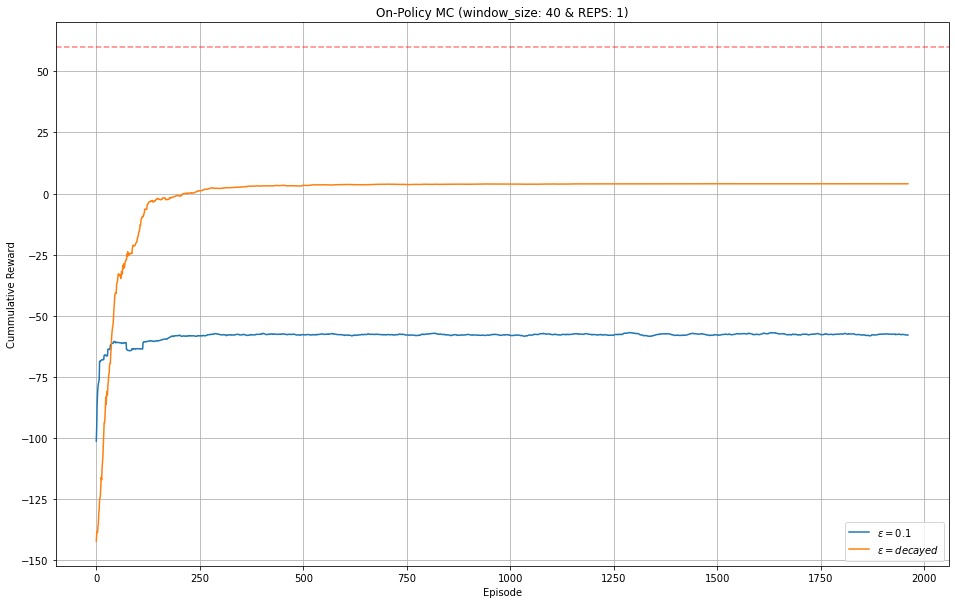

In [303]:
plt.figure(figsize=(16,10))
plt.title('On-Policy MC (window_size: 40 & REPS: 1)')
plt.plot(np.convolve(np.mean(cumulative_reward_On_Policy_MC_no_decay_epsilon, axis=0), np.ones(40)/40, mode='valid'), label='$ε=0.1$')
plt.plot(np.convolve(np.mean(cumulative_reward_On_Policy_MC_decay_epsilon, axis=0), np.ones(40)/40, mode='valid'), label='$ε=decayed$')
plt.axhline(y=max(optimal_policy_1, optimal_policy_2, 60), ls='--', c='r', alpha=0.5)
plt.xlabel('Episode')
plt.ylabel('Cummulative Reward')
plt.legend()
plt.grid()
plt.show()

<a name='5-3'></a>
## plot result: REPS = 4

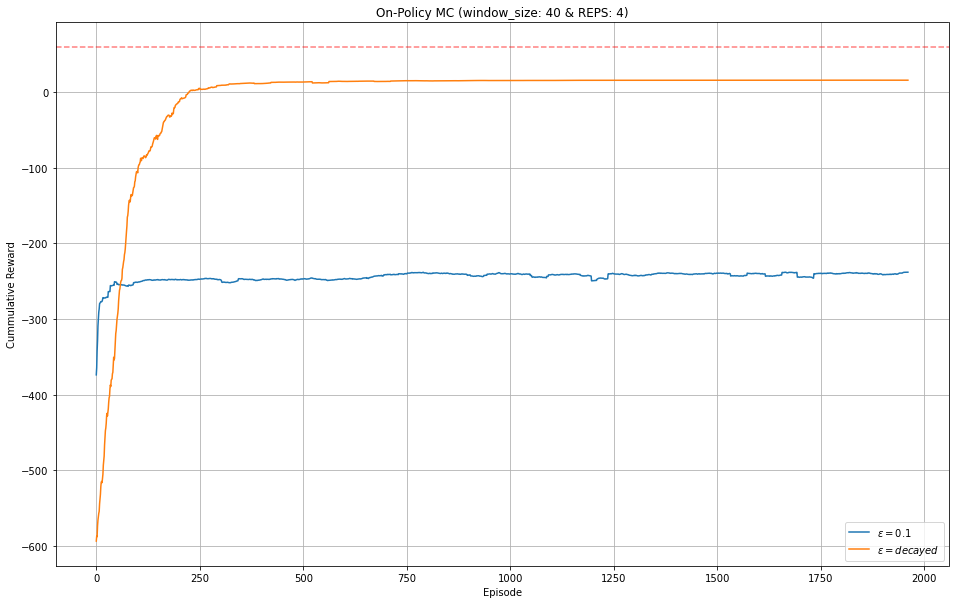

In [308]:
plt.figure(figsize=(16,10))
plt.title('On-Policy MC (window_size: 40 & REPS: 4)')
plt.plot(np.convolve(np.mean(cumulative_reward_On_Policy_MC_no_decay_epsilon, axis=0), np.ones(40)/40, mode='valid'), label='$ε=0.1$')
plt.plot(np.convolve(np.mean(cumulative_reward_On_Policy_MC_decay_epsilon, axis=0), np.ones(40)/40, mode='valid'), label='$ε=decayed$')
plt.axhline(y=max(optimal_policy_1, optimal_policy_2, 60), ls='--', c='r', alpha=0.5)
plt.xlabel('Episode')
plt.ylabel('Cummulative Reward')
plt.legend()
plt.grid()
plt.show()

<a name='5-4'></a>
## plot result: REPS = 10

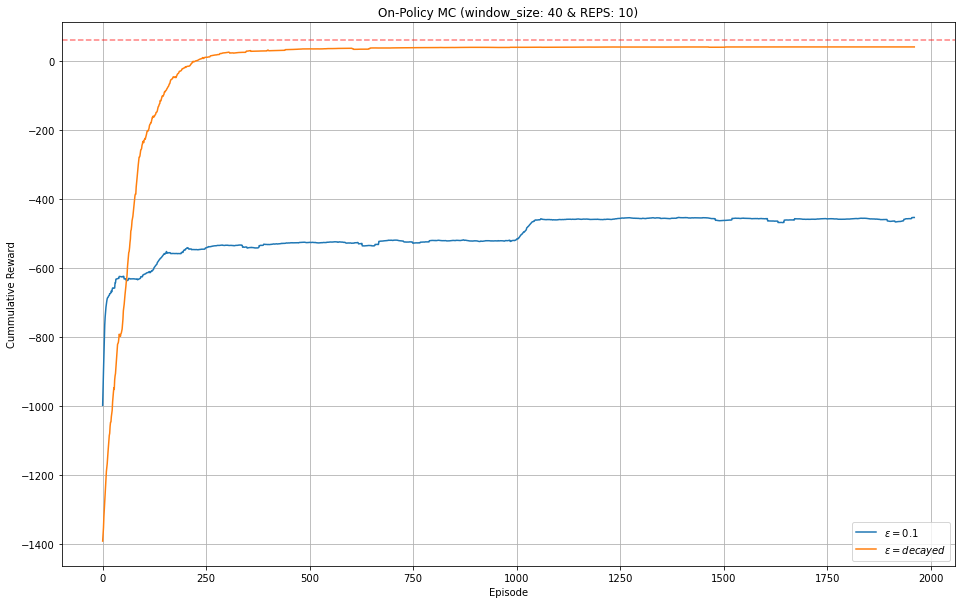

In [312]:
plt.figure(figsize=(16,10))
plt.title('On-Policy MC (window_size: 40 & REPS: 10)')
plt.plot(np.convolve(np.mean(cumulative_reward_On_Policy_MC_no_decay_epsilon, axis=0), np.ones(40)/40, mode='valid'), label='$ε=0.1$')
plt.plot(np.convolve(np.mean(cumulative_reward_On_Policy_MC_decay_epsilon, axis=0), np.ones(40)/40, mode='valid'), label='$ε=decayed$')
plt.axhline(y=max(optimal_policy_1, optimal_policy_2, 60), ls='--', c='r', alpha=0.5)
plt.xlabel('Episode')
plt.ylabel('Cummulative Reward')
plt.legend()
plt.grid()
plt.show()

<a name='5-5'></a>
## test learned agent

In [282]:
def run_20_episode_2(agent):
    for episode in range(1):
        state = agent.reset()
        rewards = []
               
        clear_output(wait=True)
        env.render()
        time.sleep(0.5)
        
        while True:
            
            action = agent.choose_best_action(state)
            next_state, reward, done = agent.take_action(state, action)
            state = next_state
            taxi_row, taxi_col, pass_idx, dest_idx = env.decode(state)
            if (pass_idx == dest_idx):
                reward = 70
            rewards.append(reward)
            
            clear_output(wait=True)
            env.render()
            print("Score:", np.sum(rewards))
            time.sleep(0.5)

            if done:
                break

In [293]:
run_20_episode_2(optimal_agent_2)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Score: 60



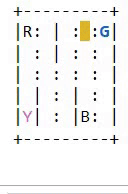

In [313]:
b64 = base64.b64encode(open("Q5.gif",'rb').read()).decode('ascii')
display(HTML(f'<img src="data:image/gif;base64,{b64}" />'))